In [1]:
# 2D Filter
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('an.jpg')

kernel = np.ones((3,3),np.float32) * (-1)
kernel[1,1] = 8
print(kernel)
dst = cv2.filter2D(img,-1,kernel)

plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dst),plt.title('Filters')
plt.xticks([]), plt.yticks([])
plt.show()

[[-1. -1. -1.]
 [-1.  8. -1.]
 [-1. -1. -1.]]


C:\Users\Pavilion\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  from ipykernel import kernelapp as app


L 1217.712 -1158.061
L 255.0 0.0
A 503.5879 25.461802
A 255.0 0.0


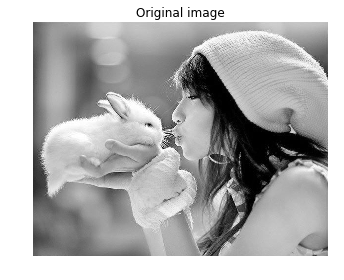

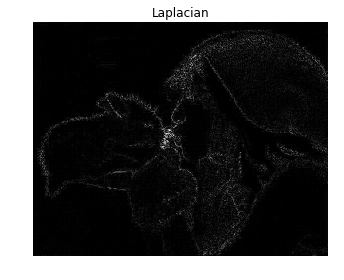

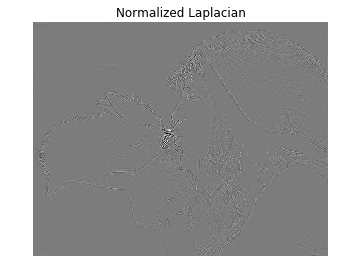

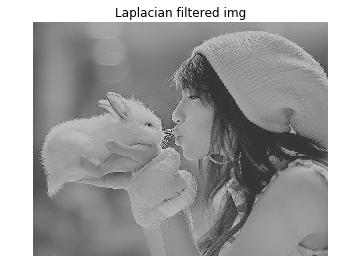

In [2]:
# Laplacian filter

import matplotlib.cm as cm
import scipy.misc
import scipy.ndimage.filters


pic_n = 1
def show_abs(I, plot_title):
    plt.title(plot_title)
    plt.tight_layout()
    plt.axis('off')
    plt.imshow(abs(I), cm.gray)

A = scipy.misc.imread('an.jpg', flatten=True)

plt.figure(pic_n)
pic_n += 1
show_abs(A, 'Original image')

A          -= np.amin(A) 
A          *= 255.0/np.amax(A)

#Kernel for negative Laplacian
kernel      = np.ones((3,3))*(-1)
kernel[1,1] = 8

Lap         = scipy.ndimage.filters.convolve(A, kernel)


print('L', np.amax(Lap), np.amin(Lap))

plt.figure(pic_n)
pic_n += 1
show_abs(Lap, 'Laplacian')


Lap        -= np.amin(Lap)
Lap        *= 255.0/np.amax(Lap)
print('L', np.amax(Lap), np.amin(Lap))

plt.figure(pic_n)
pic_n += 1
show_abs(Lap, 'Normalized Laplacian')

A         += Lap 
print('A', np.amax(A), np.amin(A))
A          -= np.amin(A)
A          *= 255.0/np.amax(A)
print('A', np.amax(A), np.amin(A))

plt.figure(pic_n)
pic_n += 1
show_abs(A, 'Laplacian filtered img')

plt.show()

C:\Users\Pavilion\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  import sys


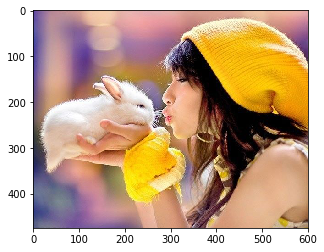

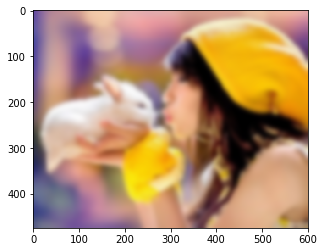

In [3]:
# Gaussian Filter

import numpy as np
import scipy.ndimage as ndimage
import matplotlib.pyplot as plt

img = ndimage.imread('an.jpg')
plt.imshow(img, interpolation='nearest')
plt.show()

img = ndimage.gaussian_filter(img, sigma=(5, 5, 0), order=0)
plt.imshow(img, interpolation='nearest')
plt.show()

In [4]:
# Ideal Low and High Pass Filter
import matplotlib.pyplot as plt
import numpy as np
from scipy import ndimage
import Image

def plot(data, title):
    plot.i += 1
    plt.subplot(2,2,plot.i)
    plt.imshow(data)
    plt.gray()
    plt.title(title)
plot.i = 0

# Load the data...
im = Image.open('an.jpg')
data = np.array(im, dtype=float)
plot(data, 'Original')


kernel = np.array([[-1, -1, -1],
                   [-1,  8, -1],
                   [-1, -1, -1]])
highpass_3x3 = ndimage.convolve(data, kernel)
plot(highpass_3x3, 'Simple 3x3 Lowpass')


kernel = np.array([[-1, -1, -1, -1, -1],
                   [-1,  1,  2,  1, -1],
                   [-1,  2,  4,  2, -1],
                   [-1,  1,  2,  1, -1],
                   [-1, -1, -1, -1, -1]])
highpass_5x5 = ndimage.convolve(data, kernel)
plot(highpass_5x5, 'Simple 5x5 Highpass')


lowpass = ndimage.ideal_filter(data, 3)
gauss_highpass = data - lowpass
plot(gauss_highpass, r'idle Highpass, $\sigma = 3 pixels$')

plt.show()

ModuleNotFoundError: No module named 'Image'